# 1. In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv('nba_2013.csv')

In [55]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [56]:
df.shape

(481, 31)

In [57]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [58]:
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [59]:
df['fg.'] = df['fg.'].fillna(df['fg.'].mean())
df['x3p.'] = df['fg.'].fillna(df['fg.'].mean())
df['x2p.'] = df['fg.'].fillna(df['fg.'].mean())
df['efg.'] = df['fg.'].fillna(df['fg.'].mean())
df['ft.'] = df['fg.'].fillna(df['fg.'].mean())

In [60]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [61]:
set(df['season'])

{'2013-2014'}

In [62]:
df.drop(['season','season_end'],axis=1,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 29 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             481 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            481 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            481 non-null float64
efg.            481 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             481 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [74]:
df.drop(['player','bref_team_id','pos'],axis=1,inplace=True)

In [75]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [77]:
x_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
66,23,26,0,224,26,86,0.302000,3,30,0.302000,...,13,0.302000,8,20,28,41,13,3,16,19
397,26,2,0,2,0,0,0.436436,0,0,0.436436,...,0,0.436436,0,0,0,0,0,0,0,0
86,25,71,2,1283,173,410,0.422000,61,176,0.422000,...,122,0.422000,55,205,260,88,44,14,72,100
31,28,42,39,1257,222,502,0.442000,30,108,0.442000,...,102,0.442000,69,153,222,45,14,52,58,100
84,37,81,0,1973,330,811,0.407000,146,371,0.407000,...,196,0.407000,67,217,284,212,61,35,108,209


In [82]:
#len(set(df['player']))

In [83]:
#len(set(df['bref_team_id']))

In [81]:
#len(set(df['pos']))

In [84]:
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.468,...,0.468,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.503,...,0.503,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.520,...,0.520,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.459,...,0.459,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.546,...,0.546,94,183,277,40,23,46,63,187,328


In [85]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [87]:
y_pred = knn.predict(x_test)

In [88]:
from sklearn.metrics import r2_score

score = r2_score(y_pred,y_test)
score

0.9794589183473466

# 2. In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
import re


In [3]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [4]:
wordlist = soup.findAll(text=lambda text: text and 'availability' in text)

In [5]:
len(wordlist)

15

In [ ]:
#soup

# 3. In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

# 4. In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [89]:
from sklearn import datasets
data = datasets.load_iris()

In [97]:
x = data.data
y = data.target

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)

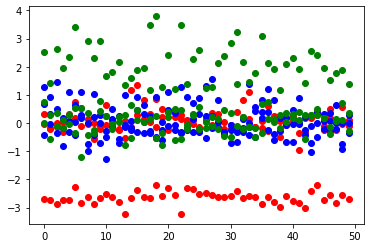

In [115]:
plt.plot(x_pca[y==0],'ro')
plt.plot(x_pca[y==1],'bo')
plt.plot(x_pca[y==2],'go')

In [104]:
x_pca.shape

(150, 3)

In [111]:
len(y[y==0])

50

In [113]:
x_pca.shape

(150, 3)

In [114]:
len(x_pca[y==0])

50

# 5. In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [144]:
timeData = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', parse_dates=[0],index_col=0)

In [145]:
timeData.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [146]:
timeData = timeData.iloc[0:36]

In [147]:
timeData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
Sales of shampoo over a three year period    36 non-null float64
dtypes: float64(1)
memory usage: 576.0+ bytes


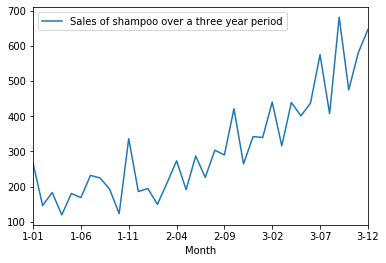

In [148]:
timeData.plot()

In [149]:
import statsmodels.api as sm

In [150]:
sm.stats.durbin_watson(timeData)

array([0.09548538])

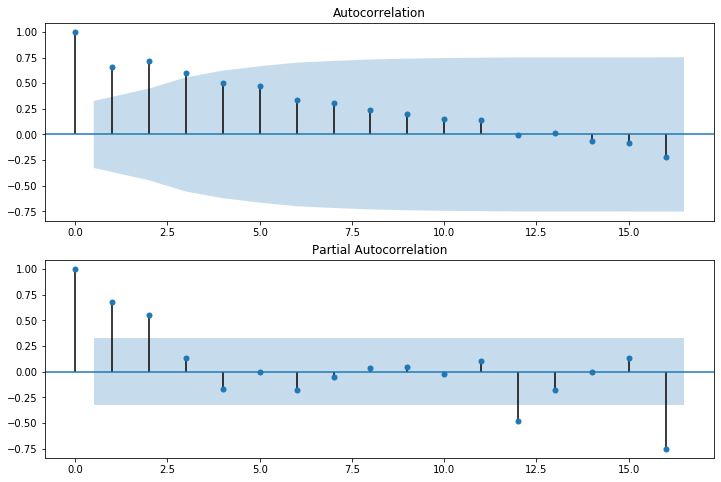

In [154]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeData,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeData,ax=ax2)

In [155]:
#p = 4
#q = 3

In [165]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(timeData,order=(4,1,3))
timeModel = arima.fit()

/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [166]:
timeModel.aic

400.65677258684343

In [167]:
arima = ARIMA(timeData,order=(5,1,4))
timeModel1 = arima.fit()

/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [168]:
timeModel1.aic

404.6813809053899

In [70]:
def isSubSequence(string1, string2,m,n): 
 
    # Base Cases 
    if m == 0:    return True
    if n == 0:    return False
  
    # If last characters of two strings are matching 
    if string1[m-1] == string2[n-1]: 
        return isSubSequence(string1, string2, m-1, n-1) 
  
    # If last characters are not matching 
    return isSubSequence(string1, string2, m, n-1) 
  
# Driver program to test the above function 
string1 = "gksrek"
string2 = "geeksforgeeks"
  
if isSubSequence(string1, string2): 
    print("Yes")
else: 
    print("No")

TypeError: isSubSequence() takes 2 positional arguments but 4 were given